# Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1: Personal Finance Planner: Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_price_api = requests.get(btc_url).json()
print(json.dumps(btc_price_api, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19011275,
            "id": 1,
            "last_updated": 1649925213,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 785646742083,
                    "percent_change_1h": -0.106360203623646,
                    "percent_change_24h": 2.83051786095858,
                    "percent_change_7d": -4.46618410865644,
                    "percentage_change_1h": -0.106360203623646,
                    "percentage_change_24h": 2.83051786095858,
                    "percentage_change_7d": -4.46618410865644,
                    "price": 41269.0,
                    "volume_24h": 25832534169
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19011275,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Compute current value of my crpto
btc_price = btc_price_api['data']['1']['quotes']['USD']['price']
btc_value = my_btc * btc_price

# Print current crypto wallet balance
print(f"The current value of my {my_btc} BTC is ${btc_value:.0f}")

The current value of my 1.2 BTC is $49523


In [8]:
# Fetch current ETH price
eth_price_api = requests.get(eth_url).json()
print(json.dumps(eth_price_api, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120372271,
            "id": 1027,
            "last_updated": 1649925153,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 375383856362,
                    "percent_change_1h": -0.0996935417796344,
                    "percent_change_24h": 1.96294923595476,
                    "percent_change_7d": -1.81163858583835,
                    "percentage_change_1h": -0.0996935417796344,
                    "percentage_change_24h": 1.96294923595476,
                    "percentage_change_7d": -1.81163858583835,
                    "price": 3113.92,
                    "volume_24h": 15540757835
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120372271,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocu

In [9]:
# Compute current value of my crpto
eth_price = eth_price_api['data']['1027']['quotes']['USD']['price']
eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of my {my_eth} ETH is ${eth_value:.0f}")

The current value of my 5.3 ETH is $16504


## Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('APCA-API-KEY-ID')
alpaca_secret_key = os.getenv('APCA-API-SECRET-KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version = 'v2')

In [12]:
# Format current date as ISO format
today = pd.Timestamp('2022-04-13', tz='America/New_York').isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = '1Day'

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(tickers, timeframe, start = today ,end = today).df

# Reorganize the DataFrame
# Separate ticker data
agg = df_investments[df_investments['symbol']=='AGG']
spy = df_investments[df_investments['symbol']=='SPY']


# Concatenate the ticker DataFrames
df_investments = pd.concat([agg,spy], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_investments.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-04-13 04:00:00+00:00  104.77  105.09  104.74  104.82  6868550   

                                                             SPY          \
                          trade_count        vwap symbol    open    high   
timestamp                                                                  
2022-04-13 04:00:00+00:00       27348  104.889799    AGG  437.96  444.11   

                                                                             \
                              low   close    volume trade_count        vwap   
timestamp                                                                     
2022-04-13 04:00:00+00:00  437.84  443.31  73734315      563285  441.262058   

                                  
                          symbol  
timestamp                         
2022-04-13 04:00:00+00:00    SPY

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments['AGG']['close'])
spy_close_price = float(df_investments['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.82
Current SPY closing price: $443.31


In [14]:
# Compute the current value of shares
agg_value = my_agg * agg_close_price
spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${agg_value:.0f}")
print(f"The current value of your {my_spy} SPY shares is ${spy_value:.0f}")

The current value of your 200 AGG shares is $20964
The current value of your 50 SPY shares is $22166


## Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = btc_value + eth_value
shares = agg_value + spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [crypto, shares]},['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,66026.576
shares,43129.500


<AxesSubplot:title={'center':'My investments'}, ylabel='amount'>

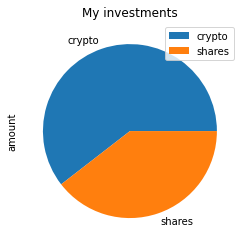

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='My investments')

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings.sum()

# Validate saving health
if int(savings) >= emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund. You have reached your financial goal.")
else:
    funds_needed = emergency_fund - int(savings)
    print(f"You are {funds_needed} dollars away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund. You have reached your financial goal.


## Part 2 : Retirement Planning using Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
today = pd.Timestamp('2022-04-13', tz='America/New_York').isoformat()
start = pd.Timestamp('2017-04-13', tz='America/New_York').isoformat()



stock_data = alpaca.get_bars(tickers, timeframe, start = start ,end = today).df

# Reorganize the DataFrame
# Separate ticker data
agg_stock = stock_data[stock_data['symbol']=='AGG']
spy_stock = stock_data[stock_data['symbol']=='SPY']


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_stock, spy_stock], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.27  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.56  109.39  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.40  109.20  109.31  1867805   

                                                             SPY           \
                          trade_count        vwap symbol    open     high   
timestamp                                                                   
2017-04-13 04:00:00+00:00       13465  109.262713    AGG  233.65  234.490   
2017-04-17 04:00:00+00:00        7973  109.294030    AGG  233.12  234.570   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG  233.71  234.490   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG  234.52  234.950   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG  234.14  235.845   

                                                                             \
                              low   close    volume trade_count        vwap   
timestamp                                                                     
2017-04-13 04:00:00+00:00  232.51  232.51  92880394      303955  233.364725   
2017-04-17 04:00:00+00:00  232.88  234.57  68405367      213643  233.870859   
2017-04-18 04:00:00+00:00  233.08  233.87  83225836      245279  233.958942   
2017-04-19 04:00:00+00:00  233.18  233.44  68699868      248643  233.953779   
2017-04-20 04:00:00+00:00  233.78  235.34  92572186      279885  234.978432   

                                  
                          symbol  
timestamp                         
2017-04-13 04:00:00+00:00    SPY  
2017-04-17 04:00:00+00:00    SPY  
2017-04-18 04:00:00+00:00    SPY  
2017-04-19 04:00:00+00:00    SPY  
2017-04-20 04:00:00+00:00    SPY

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years = MCSimulation (portfolio_data = df_stock_data, 
                           weights = (0.4,0.6),
                           num_simulation= 500,
                           num_trading_days=252*30)

In [21]:
# Printing the simulation input data
MC_thirty_years.portfolio_data.dropna().head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-04-17 04:00:00+00:00  109.30  109.4000  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.7000  109.39  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.5600  109.39  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.4000  109.20  109.31  1867805   
2017-04-21 04:00:00+00:00  109.40  109.4899  109.30  109.34  1539265   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-04-17 04:00:00+00:00        7973  109.294030    AGG    -0.000549  233.12   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG     0.004029  233.71   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG    -0.001550  234.52   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG    -0.001553  234.14   
2017-04-21 04:00:00+00:00        8708  109.386803    AGG     0.000274  235.22   

                                                                           \
                              high     low   close     volume trade_count   
timestamp                                                                   
2017-04-17 04:00:00+00:00  234.570  232.88  234.57   68405367      213643   
2017-04-18 04:00:00+00:00  234.490  233.08  233.87   83225836      245279   
2017-04-19 04:00:00+00:00  234.950  233.18  233.44   68699868      248643   
2017-04-20 04:00:00+00:00  235.845  233.78  235.34   92572186      279885   
2017-04-21 04:00:00+00:00  235.310  234.13  234.59  110389847      258915   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-04-17 04:00:00+00:00  233.870859    SPY     0.008860  
2017-04-18 04:00:00+00:00  233.958942    SPY    -0.002984  
2017-04-19 04:00:00+00:00  233.953779    SPY    -0.001839  
2017-04-20 04:00:00+00:00  234.978432    SPY     0.008139  
2017-04-21 04:00:00+00:00  234.784238    SPY    -0.003187

In [22]:
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996061,0.996135,1.002481,0.995998,1.004563,1.009925,0.987594,0.995805,1.012000,1.016020,...,0.991440,1.000719,0.994885,1.010975,0.996449,1.006815,1.003857,1.007586,0.995830,1.014457
2,0.998823,0.996931,1.011785,0.988783,0.996675,0.998653,0.984545,1.004850,1.015066,1.018286,...,0.991626,1.000382,0.999946,1.015239,0.986205,1.008691,0.988850,1.013081,0.997649,1.020887
3,0.996465,0.998461,1.011302,0.991746,1.009635,0.999107,0.996536,0.998225,1.013800,1.014549,...,0.994164,0.995570,1.006857,1.001793,0.973142,1.024911,0.996389,1.017300,0.994873,1.031769
4,0.993699,1.001070,1.021079,0.995273,1.014364,1.000484,0.987939,1.006988,1.011158,1.010428,...,1.001746,0.996899,1.009281,0.999244,0.980787,1.031065,0.991179,1.020651,0.997242,1.045798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.797307,13.817080,14.812334,11.351255,13.674343,6.500980,11.633673,7.848927,25.760548,12.542578,...,29.891661,37.545027,9.786027,6.105719,7.763994,5.366482,3.424108,18.822464,7.866193,5.581996
7557,1.796334,13.897404,14.758487,11.281234,13.907596,6.565807,11.727520,7.829637,25.519939,12.486016,...,29.804867,37.001402,9.846338,6.079876,7.783579,5.298413,3.401920,18.765507,7.907587,5.582142
7558,1.794263,13.868952,14.807035,11.300100,13.801446,6.578399,11.792900,7.901277,25.422366,12.537424,...,29.838391,36.677422,9.821346,6.111453,7.786926,5.312112,3.459147,18.824207,7.862624,5.630210
7559,1.785577,13.781806,14.679966,11.394992,13.688612,6.629578,11.812333,7.938322,25.162904,12.590241,...,29.858618,36.373108,9.850114,6.255811,7.823407,5.306370,3.485968,19.016466,7.840964,5.608682


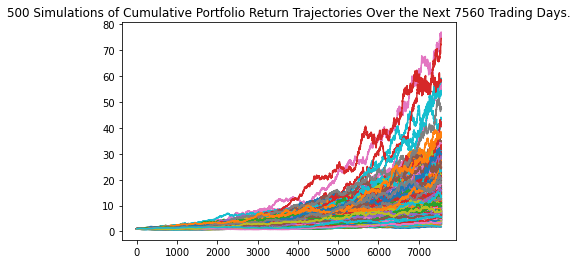

In [23]:
# Plot simulation outcomes
MC_thirty_years_line_plot = MC_thirty_years.plot_simulation()

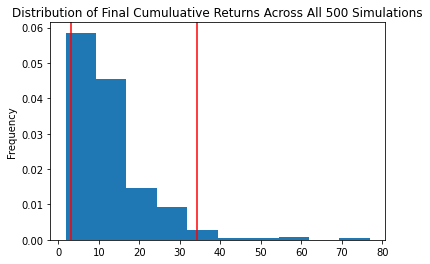

In [24]:
# Plot probability distribution and confidence intervals
MC_thirty_years_dist = MC_thirty_years.plot_distribution()

## Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_thirty_years_stats = MC_thirty_years.summarize_cumulative_return()

# Print summary statistics
print(MC_thirty_years_stats)

count           500.000000
mean             12.817396
std               9.417345
min               1.804333
25%               6.671382
50%              10.238106
75%              15.999375
max              76.950698
95% CI Lower      3.116751
95% CI Upper     34.160272
Name: 7560, dtype: float64


## Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_thirty_years = round(MC_thirty_years_stats[-2]*initial_investment,2)
ci_upper_thirty_years = round(MC_thirty_years_stats[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio over the next 30 years will end within in the range of ${ci_lower_thirty_years} and ${ci_upper_thirty_years}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $62335.02 and $683205.43


## Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_thirty_years = round(MC_thirty_years_stats[-2]*initial_investment,2)
ci_upper_thirty_years = round(MC_thirty_years_stats[-1]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_years} and ${ci_upper_thirty_years}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $93502.52 and $1024808.15


# Optional Challenge 
## Early Retirement Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation (portfolio_data = df_stock_data, 
                           weights = (0.4,0.6),
                           num_simulation= 500,
                           num_trading_days=252*5)

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.27  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.56  109.39  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.40  109.20  109.31  1867805   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-04-13 04:00:00+00:00       13465  109.262713    AGG          NaN  233.65   
2017-04-17 04:00:00+00:00        7973  109.294030    AGG    -0.000549  233.12   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG     0.004029  233.71   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG    -0.001550  234.52   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG    -0.001553  234.14   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2017-04-13 04:00:00+00:00  234.490  232.51  232.51  92880394      303955   
2017-04-17 04:00:00+00:00  234.570  232.88  234.57  68405367      213643   
2017-04-18 04:00:00+00:00  234.490  233.08  233.87  83225836      245279   
2017-04-19 04:00:00+00:00  234.950  233.18  233.44  68699868      248643   
2017-04-20 04:00:00+00:00  235.845  233.78  235.34  92572186      279885   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-04-13 04:00:00+00:00  233.364725    SPY          NaN  
2017-04-17 04:00:00+00:00  233.870859    SPY     0.008860  
2017-04-18 04:00:00+00:00  233.958942    SPY    -0.002984  
2017-04-19 04:00:00+00:00  233.953779    SPY    -0.001839  
2017-04-20 04:00:00+00:00  234.978432    SPY     0.008139

In [32]:
# Plot simulation outcomes
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008624,0.994636,0.995938,0.998676,0.997859,1.017950,0.992223,0.989731,1.008614,0.998677,...,1.001521,1.002947,0.998379,0.999394,1.014043,0.990680,1.005459,1.000065,0.997666,0.994715
2,1.015952,0.998446,0.985079,0.989891,0.977363,1.036900,0.982193,0.984194,1.004476,0.985026,...,0.985412,0.997033,1.010173,1.001460,1.016178,1.001165,1.015675,0.998682,0.987913,1.000810
3,1.009116,0.994418,0.973615,0.980644,0.967467,1.019812,0.975773,0.991364,0.997958,0.983489,...,0.991309,0.995052,1.009643,1.008229,1.015890,0.996452,1.030474,0.985813,0.989151,0.995160
4,1.005387,0.993196,0.970210,0.973776,0.976269,1.007276,0.978093,0.988737,1.000609,0.985685,...,0.973586,0.994054,1.009450,1.008443,1.030944,0.992225,1.026458,0.985827,0.988242,0.995892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.568827,1.355280,0.886710,2.070665,1.256485,1.597407,1.601552,1.219056,2.648901,1.015332,...,1.993803,1.096297,1.546574,1.407745,0.991420,1.292488,2.075717,0.616529,1.151072,1.366312
1257,1.576986,1.349082,0.886013,2.073410,1.256861,1.581706,1.620073,1.213207,2.657736,1.018050,...,2.008926,1.093292,1.559698,1.409877,0.984400,1.305160,2.088449,0.612703,1.142299,1.379872
1258,1.576375,1.356464,0.890556,2.101098,1.256040,1.578930,1.609049,1.213510,2.648388,1.016360,...,2.003046,1.097948,1.560320,1.403710,0.988037,1.297351,2.076982,0.613612,1.160875,1.385430
1259,1.570643,1.371772,0.892391,2.127502,1.270739,1.575769,1.605323,1.218075,2.641526,1.019783,...,2.003280,1.102442,1.550096,1.410474,0.978783,1.298206,2.090383,0.603599,1.157392,1.392331


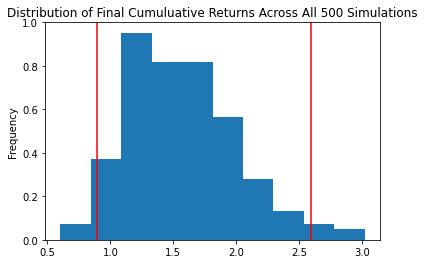

In [33]:
# Plot probability distribution and confidence intervals
MC_five_years_dist = MC_five_years.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_five_years_stats = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(MC_five_years_stats)

count           500.000000
mean              1.570555
std               0.432554
min               0.603408
25%               1.238132
50%               1.537246
75%               1.827592
max               3.017649
95% CI Lower      0.896792
95% CI Upper      2.590465
Name: 1260, dtype: float64


In [35]:
# Set initial investment
investment_five_years = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five_years = round(MC_five_years_stats[-2]*investment_five_years,2)
ci_upper_five_years = round(MC_five_years_stats[-1]*investment_five_years,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${investment_five_years} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five_years} and ${ci_upper_five_years}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53807.54 and $155427.91


## Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation (portfolio_data = df_stock_data, 
                           weights = (0.4,0.6),
                           num_simulation= 500,
                           num_trading_days=252*10)

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-04-13 04:00:00+00:00  109.25  109.39  109.13  109.27  2339939   
2017-04-17 04:00:00+00:00  109.30  109.40  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.70  109.39  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.56  109.39  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.40  109.20  109.31  1867805   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-04-13 04:00:00+00:00       13465  109.262713    AGG          NaN  233.65   
2017-04-17 04:00:00+00:00        7973  109.294030    AGG    -0.000549  233.12   
2017-04-18 04:00:00+00:00       14488  109.579396    AGG     0.004029  233.71   
2017-04-19 04:00:00+00:00        9587  109.455386    AGG    -0.001550  234.52   
2017-04-20 04:00:00+00:00        7319  109.301387    AGG    -0.001553  234.14   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2017-04-13 04:00:00+00:00  234.490  232.51  232.51  92880394      303955   
2017-04-17 04:00:00+00:00  234.570  232.88  234.57  68405367      213643   
2017-04-18 04:00:00+00:00  234.490  233.08  233.87  83225836      245279   
2017-04-19 04:00:00+00:00  234.950  233.18  233.44  68699868      248643   
2017-04-20 04:00:00+00:00  235.845  233.78  235.34  92572186      279885   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-04-13 04:00:00+00:00  233.364725    SPY          NaN  
2017-04-17 04:00:00+00:00  233.870859    SPY     0.008860  
2017-04-18 04:00:00+00:00  233.958942    SPY    -0.002984  
2017-04-19 04:00:00+00:00  233.953779    SPY    -0.001839  
2017-04-20 04:00:00+00:00  234.978432    SPY     0.008139

In [38]:
# Plot simulation outcomes
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997266,0.990210,1.003647,0.996259,0.997005,0.997494,0.986757,1.000487,1.006684,1.013610,...,1.003188,0.996470,1.002465,1.008843,0.986518,0.999878,0.996310,1.006167,1.003122,0.998897
2,0.989861,0.995905,1.019184,0.992355,0.992577,1.005497,1.003797,1.006632,1.001110,1.022133,...,1.005068,0.994957,1.002224,1.007622,0.980978,0.993144,1.009233,1.025213,1.009309,1.002089
3,0.994149,0.983701,1.022754,0.994948,0.988459,1.006047,0.998615,1.008398,1.005477,1.021442,...,1.024878,0.990678,1.008327,1.007972,0.984912,0.997696,1.004483,1.024430,1.001942,1.000844
4,1.000920,0.990004,1.022431,1.006048,0.976135,0.998779,0.996295,1.005075,1.011079,1.021532,...,1.026986,0.996638,1.008817,1.006960,0.995327,0.991605,1.019803,1.036774,1.005739,1.001720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.765784,1.854936,3.299126,3.027126,3.198918,1.223015,2.278679,2.798356,3.634161,1.528500,...,2.292682,3.614914,2.661575,5.006692,1.961177,4.111416,1.890709,3.301279,1.938875,2.941877
2517,1.773632,1.824540,3.342882,3.054430,3.170358,1.208072,2.274710,2.776161,3.626868,1.517148,...,2.296587,3.609259,2.667705,5.023102,1.948251,4.101386,1.869236,3.350459,1.935285,2.929474
2518,1.777778,1.806645,3.364013,3.062952,3.187055,1.223289,2.262013,2.778970,3.620168,1.501839,...,2.286249,3.602867,2.690396,5.110420,1.933035,4.171426,1.884354,3.319717,1.949108,2.866969
2519,1.771569,1.806503,3.387812,3.062349,3.219510,1.220645,2.281698,2.800157,3.619562,1.499626,...,2.287864,3.607522,2.679814,5.103894,1.948858,4.202037,1.898501,3.295694,1.953578,2.874403


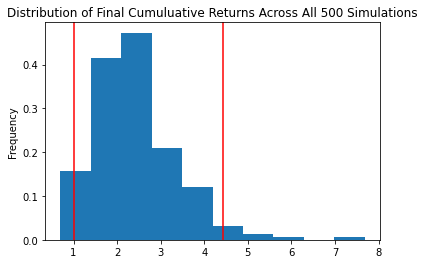

In [39]:
# Plot probability distribution and confidence intervals
MC_ten_years_dist = MC_ten_years.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_ten_years_stats = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(MC_ten_years_stats)

count           500.000000
mean              2.415689
std               0.945238
min               0.697518
25%               1.794258
50%               2.264628
75%               2.859743
max               7.680386
95% CI Lower      1.019642
95% CI Upper      4.432403
Name: 2520, dtype: float64


In [42]:
# Set initial investment
investment_ten_years = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten_years = round(MC_ten_years_stats[-2]*investment_ten_years,2)
ci_upper_ten_years = round(MC_ten_years_stats[-1]*investment_ten_years,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${investment_ten_years} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_years} and ${ci_upper_ten_years}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61178.51 and $265944.16
